Step 1: Import libraries

In [1]:
import pandas as pd

Step 2: Load the dataset

In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")

Step 3: Preview the data

In [3]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Summary of column types and non-null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Quick description of numerical columns

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


A quick view of the target column

In [6]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Now to view a few categorical columns

In [7]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'Contract']
for col in categorical_cols:
    print(f"\n{col} - Unique Values:")
    print(df[col].value_counts())


gender - Unique Values:
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen - Unique Values:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner - Unique Values:
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents - Unique Values:
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService - Unique Values:
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines - Unique Values:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService - Unique Values:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OnlineSecurity - Unique Values:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

Contract - Unique Values:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


Total Charges should be int/float, but it is object. That means there are some values that are not numeric, possibly empty strings as there are no null values as seen previously. We should remove those rows since we cannot use them

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

Drop rows where TotalCharges is NaN

In [9]:
df = df[df['TotalCharges'].notna()].copy()

In [10]:
df.reset_index(drop=True, inplace=True)

All the other categorical columns have data as "Yes" and "No" or other text format. Senior Citizen has it as 0 and 1, so let's convert it to Yes and No to maintain consistency

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

Now to replace "No internet service" with "No" in internet-related binary columns and "No phone service" with "No" in MultipleLines

In [12]:
cols_with_no_service = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_with_no_service:
    df[col] = df[col].replace({'No internet service': 'No'})

df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})

Now let's get into EDA with some visualizations. Let's import the required libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

Let's look at the current churn distribution after removing the rows with TotalCharges as NaN

In [14]:
churn_counts = df['Churn'].value_counts()
churn_counts

No     5163
Yes    1869
Name: Churn, dtype: int64

Let's look at churn by Contract Type

In [15]:
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


Customers on longer contracts are less likely to churn

Now let's look at the churn by tenure. Let's seperate them into bins based on the months

In [16]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], 
                            labels=['0-12 mo', '12-24 mo', '24-48 mo', '48-72 mo'])

tenure_churn = pd.crosstab(df['tenure_group'], df['Churn'], normalize='index') * 100
tenure_churn

Churn,No,Yes
tenure_group,,
0-12 mo,52.321839,47.678161
12-24 mo,71.289062,28.710938
24-48 mo,79.611041,20.388959
48-72 mo,90.486824,9.513176


Churn is more with newly joined people (0-12 months). Long term users have retained more

Now to see Monthly Charges by Churn

In [17]:
monthly_charge_churn = df[['MonthlyCharges', 'Churn']]
churn_counts, contract_churn, tenure_churn, monthly_charge_churn.head()

(No     5163
 Yes    1869
 Name: Churn, dtype: int64,
 Churn                  No        Yes
 Contract                            
 Month-to-month  57.290323  42.709677
 One year        88.722826  11.277174
 Two year        97.151335   2.848665,
 Churn                No        Yes
 tenure_group                      
 0-12 mo       52.321839  47.678161
 12-24 mo      71.289062  28.710938
 24-48 mo      79.611041  20.388959
 48-72 mo      90.486824   9.513176,
    MonthlyCharges Churn
 0           29.85    No
 1           56.95    No
 2           53.85   Yes
 3           42.30    No
 4           70.70   Yes)

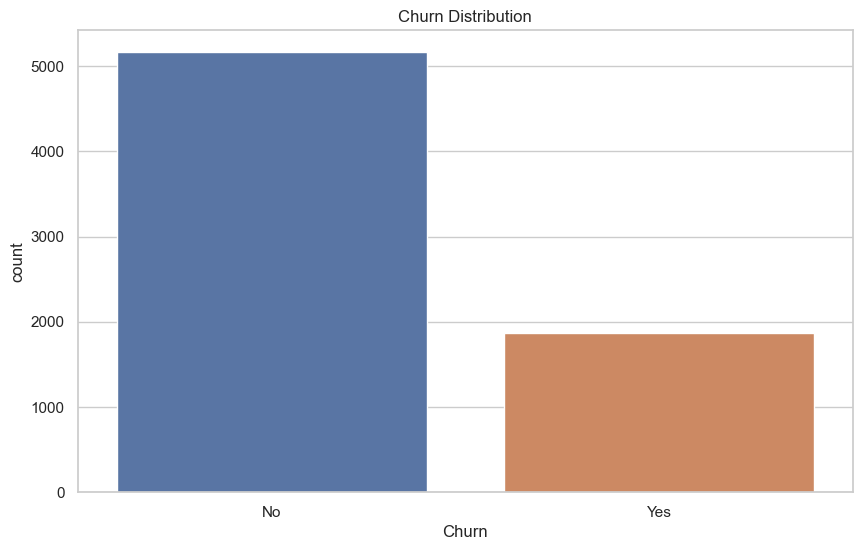

In [18]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

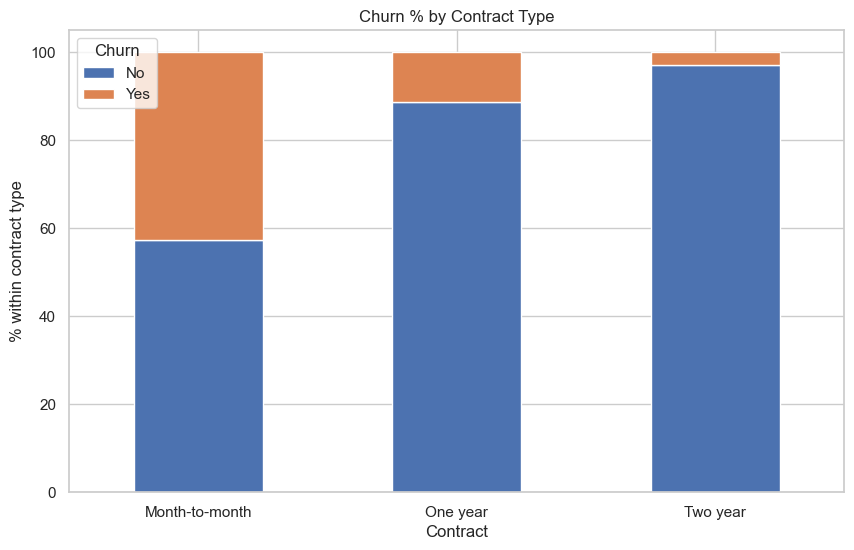

In [19]:
contract_churn.plot(kind='bar', stacked=True)
plt.title("Churn % by Contract Type")
plt.ylabel("% within contract type")
plt.xticks(rotation=0)
plt.show()

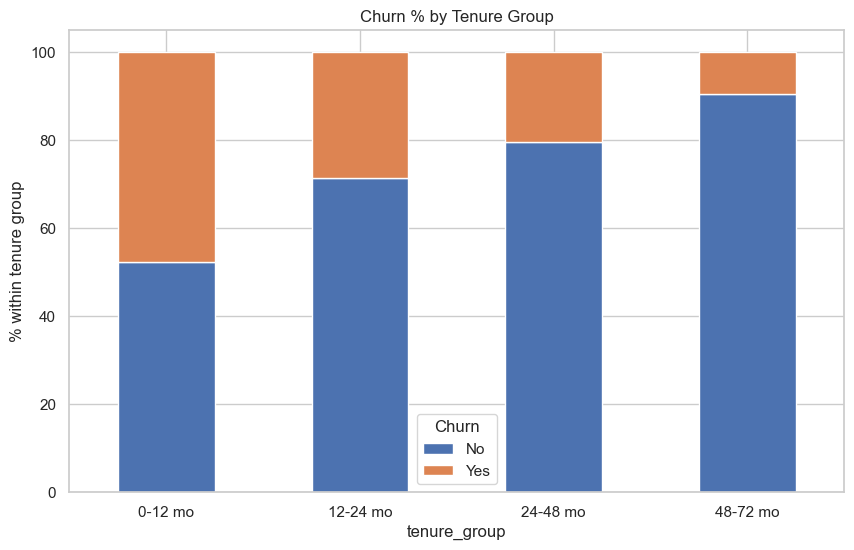

In [20]:
tenure_churn.plot(kind='bar', stacked=True)
plt.title("Churn % by Tenure Group")
plt.ylabel("% within tenure group")
plt.xticks(rotation=0)
plt.show()

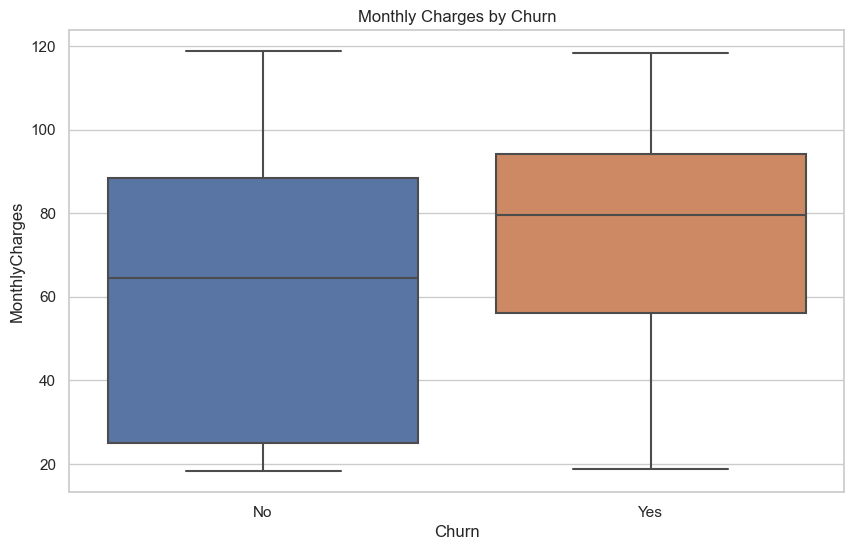

In [21]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

Now let's do some Feature Engineering, like dropping Customer ID column that cannot be used further

In [22]:
df_model = df.drop(columns=['customerID', 'tenure_group'])

Now to encode the target variable

In [23]:
df_model['Churn'] = df_model['Churn'].map({'No': 0, 'Yes': 1})

Now we have to identify which columns have binary values and which has multi category values so we can apply label encoding and one hot encoding respectively

In [24]:
binary_cols = [col for col in df_model.columns if df_model[col].nunique() == 2 and col != 'Churn']

multi_cat_cols = [col for col in df_model.columns if df_model[col].dtype == 'object' and col not in binary_cols]

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
for col in binary_cols:
    df_model[col] = le.fit_transform(df_model[col])

In [29]:
df_model = pd.get_dummies(df_model, columns=multi_cat_cols)

Now to scale all the numerical columns so they're in the same scale

In [30]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_model[num_cols] = scaler.fit_transform(df_model[num_cols])

Now we have to split the target and feature variables

In [31]:
X = df_model.drop('Churn', axis=1)
y = df_model['Churn']

Now, we split the data into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

We'll start with Logistic Regression as a baseline model since this is a Classification Problem and then compare this with other models

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [34]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Now to predict on test set

In [35]:
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

In [36]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [37]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[918 115]
 [161 213]]


In [38]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

ROC-AUC Score: 0.836050701192208


This baseline model performs decently. However, it's not ideal at capturing true churners (Recall = 57%)

Now let's try Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [43]:
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, output_dict=False))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.64      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [44]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[924 109]
 [184 190]]


In [45]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

ROC-AUC Score: 0.8209125593386168


While overall accuracy is similar to Logistic Regression, recall for churn class dropped from 57% → 51%, which means more missed churns.

Now let's try XGBoost Classifier

In [48]:
from xgboost import XGBClassifier

In [49]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

C:\Users\varun\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:55:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [50]:
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

In [51]:
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb, output_dict=False))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1033
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



In [52]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

Confusion Matrix:
[[890 143]
 [180 194]]


In [53]:
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

ROC-AUC Score: 0.8082100832940762


XGBoost still doesn’t significantly improve recall for churn (only 52%)